# Introduction to Text Mining

## Read Training data

In [3]:
import pandas as pd

In [25]:
data = pd.read_excel('dataset/test.xlsx')

In [26]:
data

,text,target
0,my name is apple who love eating an orange,fruit
1,orange is my favorite fruit,fruit
2,our orange tree is planted on the yard,farm
3,farmer grows an apple tree,farm
4,farmer keep apple seeds in a barn,farm


In [27]:
X_train = data['text'].tolist()

In [38]:
y_train = data['target'].tolist()

['fruit', 'fruit', 'farm', 'farm', 'farm']

## Data Preparation - Vectorization

In [30]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vocab = ['name','apple','love','eating','orange','favorite','fruit','tree','planted','yard','farmer','grows','keep','seeds','barn']

In [31]:
tok = lambda x: x.split(' ')
vectorizer = CountVectorizer(vocabulary=vocab, tokenizer=tok)
vectorizer.fit(X_train)
X_vector = vectorizer.transform(X_train).toarray()

In [32]:
X_vector

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]])

## Training Process

In [43]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(X_vector, y_train)
print(vectorizer.get_feature_names())

['name', 'apple', 'love', 'eating', 'orange', 'favorite', 'fruit', 'tree', 'planted', 'yard', 'farmer', 'grows', 'keep', 'seeds', 'barn']


## Testing Process

In [44]:
X_test = ['apple is my favorite']
x_test_vector = vectorizer.transform(X_test).toarray()

In [45]:
x_test_vector

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [46]:
predicted = model.predict(x_test_vector)
print(predicted)

['fruit']


In [47]:
model.classes_

array(['farm', 'fruit'], 
      dtype='<U5')

## Display how Decision Tree model predict the test data

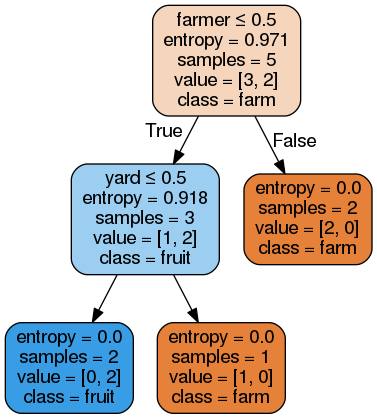

In [48]:
import os
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

feature_names = vectorizer.get_feature_names()
class_names = model.classes_

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), retina=True)

## สรุปขั้นตอนการทำ Text Mining

1. Read Data
    - EDA
        - 1.1 histogram chart
        - 1.2 pie chart
        - 1.3 Number of characters
        - 1.4 Number of words
2. Data Preparatioin 
    - 2.1 Remove stop word 
    - 2.2 Select only freq word or 
    - 2.3 Remove rare word
    - 2.4 Vectorization
        - CountVectorizer
        - TfidfVecotrizer
3. Traininig
    - Decision Tree
4. Testing
5. Evaluation
    - TrainTestSplit
    - Scoring

# Sentiment Analysis

## 1. Read Data

In [4]:
data = pd.read_excel('dataset/sms.xlsx')

In [7]:
data.shape

(1000, 2)

In [8]:
data.size

2000

In [5]:
data.head()

,message,sentiment
0,เกิด|ความ|ล่าช้า,Negative
1,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|เคานเตอร|ควร|เปิด|...,Negative
2,ประทับใจ|กา|บริการ|ดีิ,Positive
3,เกี่ยวกับ|การ|เข้า|คิว|ทำไม|ต้อง|ให้|แทรก|คิว|...,Negative
4,ระยะ|เวลา|ใน|การ|ให้|บริการ|ใน|กรณี|คิว|ลูกค้า...,Negative


In [6]:
data['sentiment'].value_counts()

Negative    544
Positive    456
Name: sentiment, dtype: int64

### 1.1 Histogram

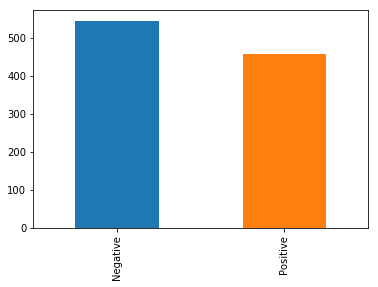

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

data['sentiment'].value_counts().plot.bar()

## 1.2 Pie Chart

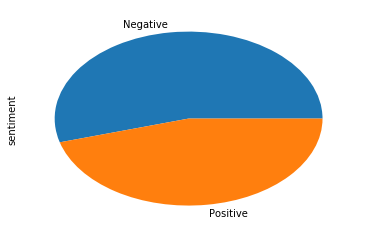

In [10]:
data['sentiment'].value_counts().plot.pie()

## 1.3 Number of characters

In [12]:
data['char_count'] = data['message'].str.len() ## this also includes spaces
data.head()

,message,sentiment,char_count
0,เกิด|ความ|ล่าช้า,Negative,16
1,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|เคานเตอร|ควร|เปิด|...,Negative,68
2,ประทับใจ|กา|บริการ|ดีิ,Positive,22
3,เกี่ยวกับ|การ|เข้า|คิว|ทำไม|ต้อง|ให้|แทรก|คิว|...,Negative,104
4,ระยะ|เวลา|ใน|การ|ให้|บริการ|ใน|กรณี|คิว|ลูกค้า...,Negative,100


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f804beb3d68>]], dtype=object)

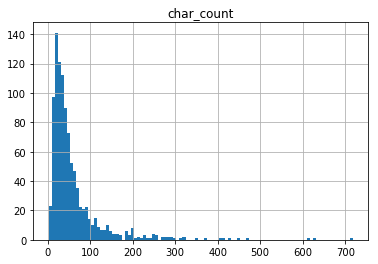

In [19]:
data.hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f804c1dea58>]], dtype=object)

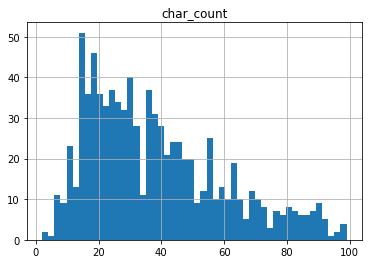

In [18]:
data[data['char_count']<100].hist(bins=150)

In [15]:
data.describe()

,char_count
count,1000.000000
mean,58.806000
std,68.029364
min,2.000000
25%,23.000000
50%,38.000000
75%,66.000000
max,718.000000


## 1.4 Number of Words

In [20]:
data['word_count'] = data['message'].apply(lambda x: len(str(x).split("|")))

In [21]:
data.head()

,message,sentiment,char_count,word_count
0,เกิด|ความ|ล่าช้า,Negative,16,3
1,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|เคานเตอร|ควร|เปิด|...,Negative,68,12
2,ประทับใจ|กา|บริการ|ดีิ,Positive,22,4
3,เกี่ยวกับ|การ|เข้า|คิว|ทำไม|ต้อง|ให้|แทรก|คิว|...,Negative,104,23
4,ระยะ|เวลา|ใน|การ|ให้|บริการ|ใน|กรณี|คิว|ลูกค้า...,Negative,100,20


In [22]:
data.describe()

,char_count,word_count
count,1000.000000,1000.000000
mean,58.806000,11.864000
std,68.029364,13.986247
min,2.000000,1.000000
25%,23.000000,5.000000
50%,38.000000,8.000000
75%,66.000000,13.000000
max,718.000000,151.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f804bbc0f28>]], dtype=object)

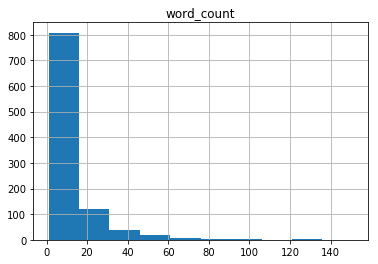

In [23]:
data[['word_count']].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f804b07d128>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f804a59c048>], dtype=object)

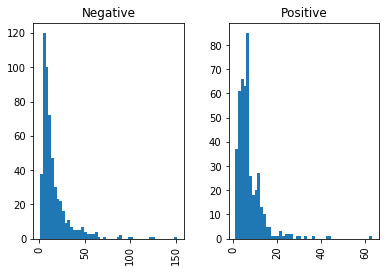

In [30]:
data.hist(column='word_count',by='sentiment', bins=50)

## 2. Data Preparation

### Now, we need to tokenize the sentences into terms.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
tok = lambda x: x.split('|')
vectorizer = CountVectorizer(tokenizer=tok)

In [ ]:
#vocab =['ล่าช้า', 'บริการ', 'พนักงาน', 'ดี', 'เวลา', 'คิว', 'เคาน์เตอร์', 'เปิด', 'ช่อง' , 'ลูกค้า', 'หน้าตา', 'ยิ้มแย้ม']
#vectorizer = CountVectorizer(vocabulary=vocab, tokenizer=tok)

In [41]:
X_train = data['message'].tolist()
y_train = data['sentiment'].tolist()

vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function <lambda> at 0x7f8045d92c80>, vocabulary=None)

In [38]:
vectorizer.get_feature_names()[:10]

['',
 'acm',
 'atm',
 'attention',
 'attentive',
 'back',
 'bit',
 'care',
 'complain',
 'corner']

In [39]:
X_train_vector = vectorizer.transform(X_train).toarray()

In [40]:
X_train_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## 3. Training a Model

In [49]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train_vector, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

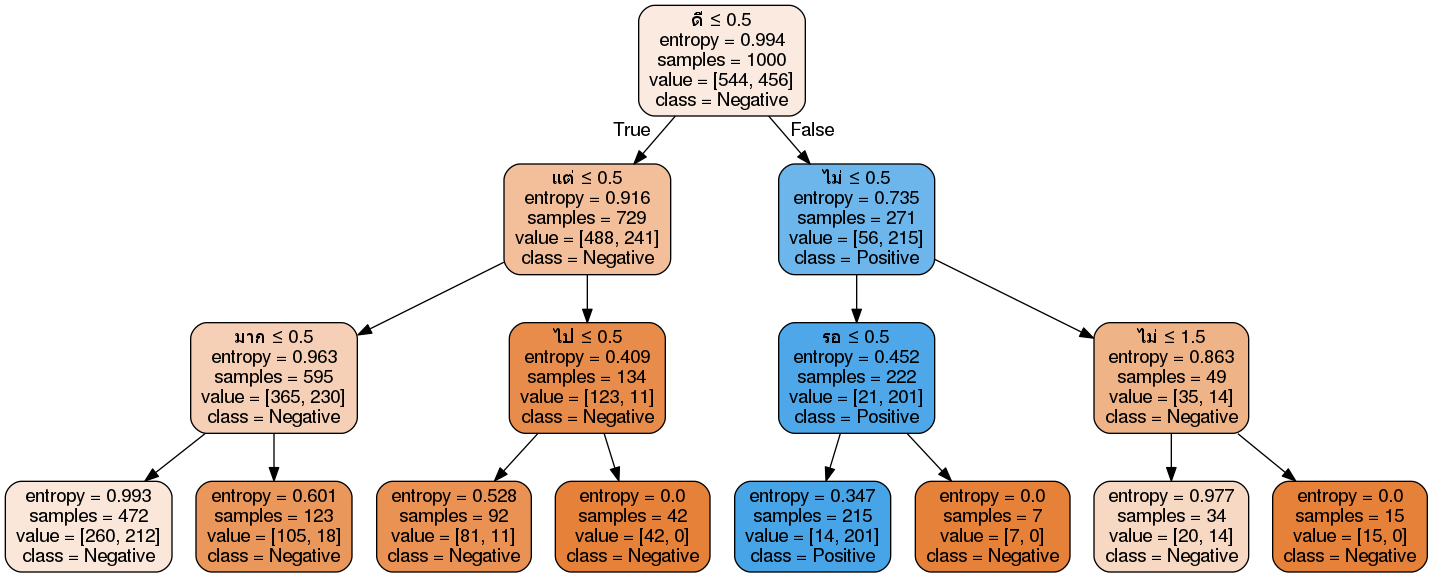

In [51]:
import os
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

feature_names = vectorizer.get_feature_names()
class_names = model.classes_

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), retina=True)

## 4. Test a Model

In [50]:
x_test = ['[บริการ|ดี|ยิ้มแย้ม|]']
x_vector_test = vectorizer.transform(x_test).toarray()
predicted = model.predict(x_vector_test)

print(x_vector_test)
print(predicted)

[[0 0 0 ..., 0 0 0]]
['Negative']


## 2. More prepare data

### 2.1 Removal of Stop Words

In [54]:
stop = ['แต่','และ','ก็','ให้','นะ','จ๊ะ','อะ','ค่ะ','ครับ','หรอ','หรอก','คะ','ค่า','การ','ความ','ใน','ที่','ซึ่ง','หรือ']
data['message_remove_stop'] = data['message'].apply(lambda x: '|'.join(x for x in x.split('|') if x not in stop))

In [58]:
data.head()

,message,sentiment,char_count,word_count,message_remove_stop
0,เกิด|ความ|ล่าช้า,Negative,16,3,เกิด|ล่าช้า
1,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|เคานเตอร|ควร|เปิด|...,Negative,68,12,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|เคานเตอร|ควร|เปิด|...
2,ประทับใจ|กา|บริการ|ดีิ,Positive,22,4,ประทับใจ|กา|บริการ|ดีิ
3,เกี่ยวกับ|การ|เข้า|คิว|ทำไม|ต้อง|ให้|แทรก|คิว|...,Negative,104,23,เกี่ยวกับ|เข้า|คิว|ทำไม|ต้อง|แทรก|คิว|ขณะ|คน|ม...
4,ระยะ|เวลา|ใน|การ|ให้|บริการ|ใน|กรณี|คิว|ลูกค้า...,Negative,100,20,ระยะ|เวลา|บริการ|กรณี|คิว|ลูกค้า|มี|จำนวน|เยอะ...


### 2.2 Use common words

In [60]:
freq = pd.Series('|'.join(data['message_remove_stop']).split('|')).value_counts()[:10]
freq

บริการ     479
พนักงาน    399
ไม่        373
คิว        340
รอ         327
ดีิ        308
มาก        266
นาน        248
ลูกค้า     242
มี         241
dtype: int64

In [74]:
freq = pd.Series('|'.join(data['message_remove_stop']).split('|')).value_counts()[:500]
freq.shape

(500,)

In [71]:
data['message_word_freq'] = data['message_remove_stop'].apply(lambda x: '|'.join(x for x in x.split('|') if x in freq))

In [72]:
data.head()

,message,sentiment,char_count,word_count,message_remove_stop,message_word_freq
0,เกิด|ความ|ล่าช้า,Negative,16,3,เกิด|ล่าช้า,เกิด|ล่าช้า
1,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|เคานเตอร|ควร|เปิด|...,Negative,68,12,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|เคานเตอร|ควร|เปิด|...,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|ควร|เปิด|เพิ่ม|ตาม...
2,ประทับใจ|กา|บริการ|ดีิ,Positive,22,4,ประทับใจ|กา|บริการ|ดีิ,ประทับใจ|กา|บริการ|ดีิ
3,เกี่ยวกับ|การ|เข้า|คิว|ทำไม|ต้อง|ให้|แทรก|คิว|...,Negative,104,23,เกี่ยวกับ|เข้า|คิว|ทำไม|ต้อง|แทรก|คิว|ขณะ|คน|ม...,เกี่ยวกับ|เข้า|คิว|ทำไม|ต้อง|แทรก|คิว|ขณะ|คน|ม...
4,ระยะ|เวลา|ใน|การ|ให้|บริการ|ใน|กรณี|คิว|ลูกค้า...,Negative,100,20,ระยะ|เวลา|บริการ|กรณี|คิว|ลูกค้า|มี|จำนวน|เยอะ...,ระยะ|เวลา|บริการ|คิว|ลูกค้า|มี|จำนวน|เยอะ|เปิด...


### 2.3 Rare word removal

In [76]:
rare = pd.Series('|'.join(data['message_remove_stop']).split('|')).value_counts()[-50:]
rare.shape

(50,)

In [78]:
data['message_word_rare'] = data['message_word_freq'].apply(lambda x: '|'.join(x for x in x.split('|') if x not in rare))
data.head(10)

,message,sentiment,char_count,word_count,message_remove_stop,message_word_freq,message_word_rare
0,เกิด|ความ|ล่าช้า,Negative,16,3,เกิด|ล่าช้า,เกิด|ล่าช้า,เกิด|ล่าช้า
1,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|เคานเตอร|ควร|เปิด|...,Negative,68,12,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|เคานเตอร|ควร|เปิด|...,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|ควร|เปิด|เพิ่ม|ตาม...,ระบบ|คิว|ไม่|มี|ประสิทธิภาพ|ควร|เปิด|เพิ่ม|ตาม...
2,ประทับใจ|กา|บริการ|ดีิ,Positive,22,4,ประทับใจ|กา|บริการ|ดีิ,ประทับใจ|กา|บริการ|ดีิ,ประทับใจ|กา|บริการ|ดีิ
3,เกี่ยวกับ|การ|เข้า|คิว|ทำไม|ต้อง|ให้|แทรก|คิว|...,Negative,104,23,เกี่ยวกับ|เข้า|คิว|ทำไม|ต้อง|แทรก|คิว|ขณะ|คน|ม...,เกี่ยวกับ|เข้า|คิว|ทำไม|ต้อง|แทรก|คิว|ขณะ|คน|ม...,เกี่ยวกับ|เข้า|คิว|ทำไม|ต้อง|แทรก|คิว|ขณะ|คน|ม...
4,ระยะ|เวลา|ใน|การ|ให้|บริการ|ใน|กรณี|คิว|ลูกค้า...,Negative,100,20,ระยะ|เวลา|บริการ|กรณี|คิว|ลูกค้า|มี|จำนวน|เยอะ...,ระยะ|เวลา|บริการ|คิว|ลูกค้า|มี|จำนวน|เยอะ|เปิด...,ระยะ|เวลา|บริการ|คิว|ลูกค้า|มี|จำนวน|เยอะ|เปิด...
5,ผู้จัดการ|และ|พนักงาน|นี้|เอาใจใส่|ยิ้มแย้ม|แจ...,Positive,58,9,ผู้จัดการ|พนักงาน|นี้|เอาใจใส่|ยิ้มแย้ม|แจ่มใส...,ผู้จัดการ|พนักงาน|นี้|เอาใจใส่|ยิ้มแย้ม|แจ่มใส...,ผู้จัดการ|พนักงาน|นี้|เอาใจใส่|ยิ้มแย้ม|แจ่มใส...
6,เข้าใจ|คน|เยอะ|แต่|น่า|บริกร|ให้|เร็ว|กว่า|นี้,Negative,46,10,เข้าใจ|คน|เยอะ|น่า|บริกร|เร็ว|กว่า|นี้,เข้าใจ|คน|เยอะ|น่า|เร็ว|กว่า|นี้,เข้าใจ|คน|เยอะ|น่า|เร็ว|กว่า|นี้
7,ระยะ|เวลา|ใน|การ|รอ|คิว|และ|การ|ทำ|รายการ|ควร|...,Negative,182,39,ระยะ|เวลา|รอ|คิว|ทำ|รายการ|ควร|เร็ว|กว่า|นี้|เ...,ระยะ|เวลา|รอ|คิว|ทำ|รายการ|ควร|เร็ว|กว่า|นี้|เ...,ระยะ|เวลา|รอ|คิว|ทำ|รายการ|ควร|เร็ว|กว่า|นี้|เ...
8,พนักงาน|เต็มใจ|ใน|การ|บริการ|ยิ้มแย้ม|แจ่มใส|ดีิ,Positive,48,8,พนักงาน|เต็มใจ|บริการ|ยิ้มแย้ม|แจ่มใส|ดีิ,พนักงาน|เต็มใจ|บริการ|ยิ้มแย้ม|แจ่มใส|ดีิ,พนักงาน|เต็มใจ|บริการ|ยิ้มแย้ม|แจ่มใส|ดีิ
9,เครื่อง|กด|บัตร|คิว|สำหรับ|เสีย|แต่|พนักงาน|บร...,Positive,62,12,เครื่อง|กด|บัตร|คิว|สำหรับ|เสีย|พนักงาน|บริหาร...,เครื่อง|กด|บัตร|คิว|สำหรับ|เสีย|พนักงาน|บริหาร...,เครื่อง|กด|บัตร|คิว|สำหรับ|เสีย|พนักงาน|บริหาร...


### 2.4 Vectorization with tfidf

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=tok)
X_vector_train = tfidf.fit_transform(data['message_word_rare'])

## 3. Traininig a Model

In [82]:
model = DecisionTreeClassifier()
model.fit(X_vector_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 4. Test a Model

In [84]:
x_test = ['[บริการ|ดี|ยิ้มแย้ม|]']
x_vector_test = tfidf.transform(x_test).toarray()
predicted = model.predict(x_vector_test)

print(predicted)

['Positive']


## 5. Evaluation

In [85]:
from sklearn.model_selection import train_test_split

In [88]:
y_train = data['sentiment'].tolist()
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_vector_train, y_train, test_size=0.2, random_state=42)

In [89]:
model.fit(X_train_s, y_train_s)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
model.score(X_test_s, y_test_s)

0.78500000000000003